<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r0-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=5403563a55d055155c9020be54a8a6674603c294b6363fef336cb81cf4909209
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [2]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bayes_opt import BayesianOptimization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-1-r0.csv?token=AKVFSOHIFH3MG4REAFN3GO263FPWE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-11-r0.csv?token=AKVFSOH52ILNZX4OJIY644263FPWO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-4-m-1-r0.csv?token=AKVFSOAKRTFHMXWXCZPLLZC63FPWU')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-4-m-11-r0.csv?token=AKVFSOHNNXLVGHGZKHIDXRC63FPW6')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-6-m-1-r0.csv?token=AKVFSOBCWKWGKUUPOXRV7ES63FPXE')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-6-m-11-r0.csv?token=AKVFSOHIB73S3LW6Z5GXATC63FPXO')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-9-m-1-r0.csv?token=AKVFSOAWQI5GZW6ZOUMGBSS63FPXU')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-9-m-11-r0.csv?token=AKVFSOCWE7X6MR2VVFT7N6263FPXY')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-normal-n-0-15-r0.csv?token=AKVFSOF3OHNQEQEYFJRDJCC63FPX6')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-normal-n-0-4-r0.csv?token=AKVFSOBUASPWDI7Z3U7JXY263FPYG')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-normal-n-0-6-r0.csv?token=AKVFSOHIKUSTDKRO65UPKPC63FPYM')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-normal-n-0-9-r0.csv?token=AKVFSOEXTYS3EMSXDOZHC7S63FPYS')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(101863, 26)
(96703, 26)
(103206, 26)
(97986, 26)
(101882, 26)
(96657, 26)
(101806, 26)
(96646, 26)
(84463, 26)
(85780, 26)
(84441, 26)
(84430, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r0-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r0-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,62,1,62,62,0,4,3,27,0
1,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,61,1,61,61,0,4,3,27,0
2,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,62,1,62,62,0,4,3,27,0
3,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,59,1,59,59,0,4,3,27,1
4,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,61,1,61,61,0,4,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135858,3276529,1,2,6,2,2,3,9,18,2,20,4,30091,3,2,0.666667,19,5,8,12,40,2,722184,18,162,0
1135859,3276536,1,2,6,3,2,3,9,18,2,20,4,30091,3,2,0.666667,26,4,9,12,36,2,1083276,18,162,0
1135860,3276543,1,2,6,4,2,3,9,18,2,20,4,30091,3,2,0.666667,33,3,10,12,30,2,1444368,18,162,0
1135861,3276550,1,2,6,5,3,3,9,18,2,20,4,30091,3,2,0.666667,40,2,11,12,22,2,2708190,18,162,0


In [8]:
df.shape

(1135863, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-12-r0.csv?token=AKVFSOCE3FVVG5OF4ZQWNJ263FQWA')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-7-r0.csv?token=AKVFSODFHFWKKECKFAQE2DS63FQFC')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-4-m-12-r0.csv?token=AKVFSOHL3NFFSRLCIW6EE2C63FQFG')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-4-m-7-r0.csv?token=AKVFSOBBXH3VVQB5FECWUA263FQFK')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-6-m-12-r0.csv?token=AKVFSOC2FER7TLSZC4Z6U4263FQFO')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-6-m-7-r0.csv?token=AKVFSOBOOMKJNNCB6YLLDTC63FQFU')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-9-m-12-r0.csv?token=AKVFSOALARMS35UNKSR6LCS63FQF2')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-9-m-7-r0.csv?token=AKVFSOBOEXI5QUDEKITKN5S63FQGA')

In [10]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(97992, 26)
(96703, 26)
(99481, 26)
(97987, 26)
(98032, 26)
(96654, 26)
(98152, 26)
(96657, 26)


In [11]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,62,1,62,62,0,4,3,27,0
1,110,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,61,2,62,122,0,4,20,340,0
2,110,1,2,1,1,4,3,9,1,1,24,8,5,3,1,0.333333,8,60,3,62,180,2,20,3,27,0
3,111,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,59,4,62,236,0,16,20,340,0
4,112,0,1,4,3,2,5,17,23,7,0,0,1,4,4,1.000000,22,58,5,62,290,0,24,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101877,3266163,0,1,7,1,4,3,9,22,6,0,0,30087,3,3,1.000000,17,5,12,16,60,0,842436,21,189,0
101878,3266207,0,1,4,1,1,5,17,23,7,0,0,30088,4,4,1.000000,21,4,13,16,52,0,120352,20,340,0
101879,3266208,0,1,4,2,2,5,17,23,7,0,0,30088,4,4,1.000000,22,3,14,16,42,0,481408,20,340,0
101880,3266209,0,1,4,3,2,5,17,23,7,0,0,30088,4,4,1.000000,23,2,15,16,30,0,722112,20,340,0


Processing

In [12]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [14]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.422214,0.012879,-0.003763,0.005847,-0.676991,-0.603193,0.006682,0.172159,-0.638534,-0.850466,0.057448,0.001771,-0.033973,-0.026162,-0.022267,0.101595,0.035275,-0.491231,-0.668445,-0.001715
inport,-0.422214,1.000000,0.206574,-0.013688,0.021258,0.087708,-0.028954,-0.044966,0.071597,0.520058,0.658212,0.249829,-0.061351,-0.019556,-0.065732,-0.032818,0.800929,0.017591,0.252697,0.124567,-0.071336
cache_coherence_type,0.012879,0.206574,1.000000,0.212857,-0.330571,-0.278820,-0.348278,0.009782,-0.000870,0.047958,0.009933,-0.240034,0.004619,-0.033148,-0.023178,-0.006006,0.239058,0.270551,0.700736,0.132427,-0.017816
flit_id,-0.003763,-0.013688,0.212857,1.000000,0.037935,0.152771,0.120956,0.004016,0.003927,0.006738,0.009999,0.403768,-0.022090,0.018886,-0.002603,-0.003347,-0.000203,0.642881,0.306736,0.244676,0.002380
flit_type,0.005847,0.021258,-0.330571,0.037935,1.000000,-0.237261,-0.187852,-0.006242,-0.006101,-0.010468,-0.015532,0.518940,-0.035272,0.040852,0.004533,0.006992,0.000318,0.167326,-0.476371,-0.379992,-0.003694
vnet,-0.676991,0.087708,-0.278820,0.152771,-0.237261,1.000000,0.966009,-0.012320,-0.009069,0.478264,0.672225,-0.192505,-0.012650,0.040084,0.022288,-0.005993,-0.357892,-0.058120,0.489750,0.906680,0.047349
vc,-0.603193,-0.028954,-0.348278,0.120956,-0.187852,0.966009,1.000000,-0.015128,-0.031109,0.388584,0.565551,-0.198641,-0.006571,0.048504,0.034068,0.002668,-0.441925,-0.083730,0.401440,0.872977,0.054191
traversal_id,0.006682,-0.044966,0.009782,0.004016,-0.006242,-0.012320,-0.015128,1.000000,0.043225,-0.003152,-0.029814,0.012742,0.127133,0.128181,0.207428,0.144468,-0.040744,0.554430,-0.000271,-0.010735,-0.272187
hop_count,0.172159,0.071597,-0.000870,0.003927,-0.006101,-0.009069,-0.031109,0.043225,1.000000,0.510977,0.080707,0.325200,-0.017438,-0.041447,-0.047841,-0.062567,0.080580,0.021036,-0.007527,-0.024955,0.001733
current_hop,-0.638534,0.520058,0.047958,0.006738,-0.010468,0.478264,0.388584,-0.003152,0.510977,1.000000,0.781145,0.303491,-0.012971,-0.015165,-0.022859,-0.027310,0.140241,-0.011211,0.398833,0.475133,-0.005857


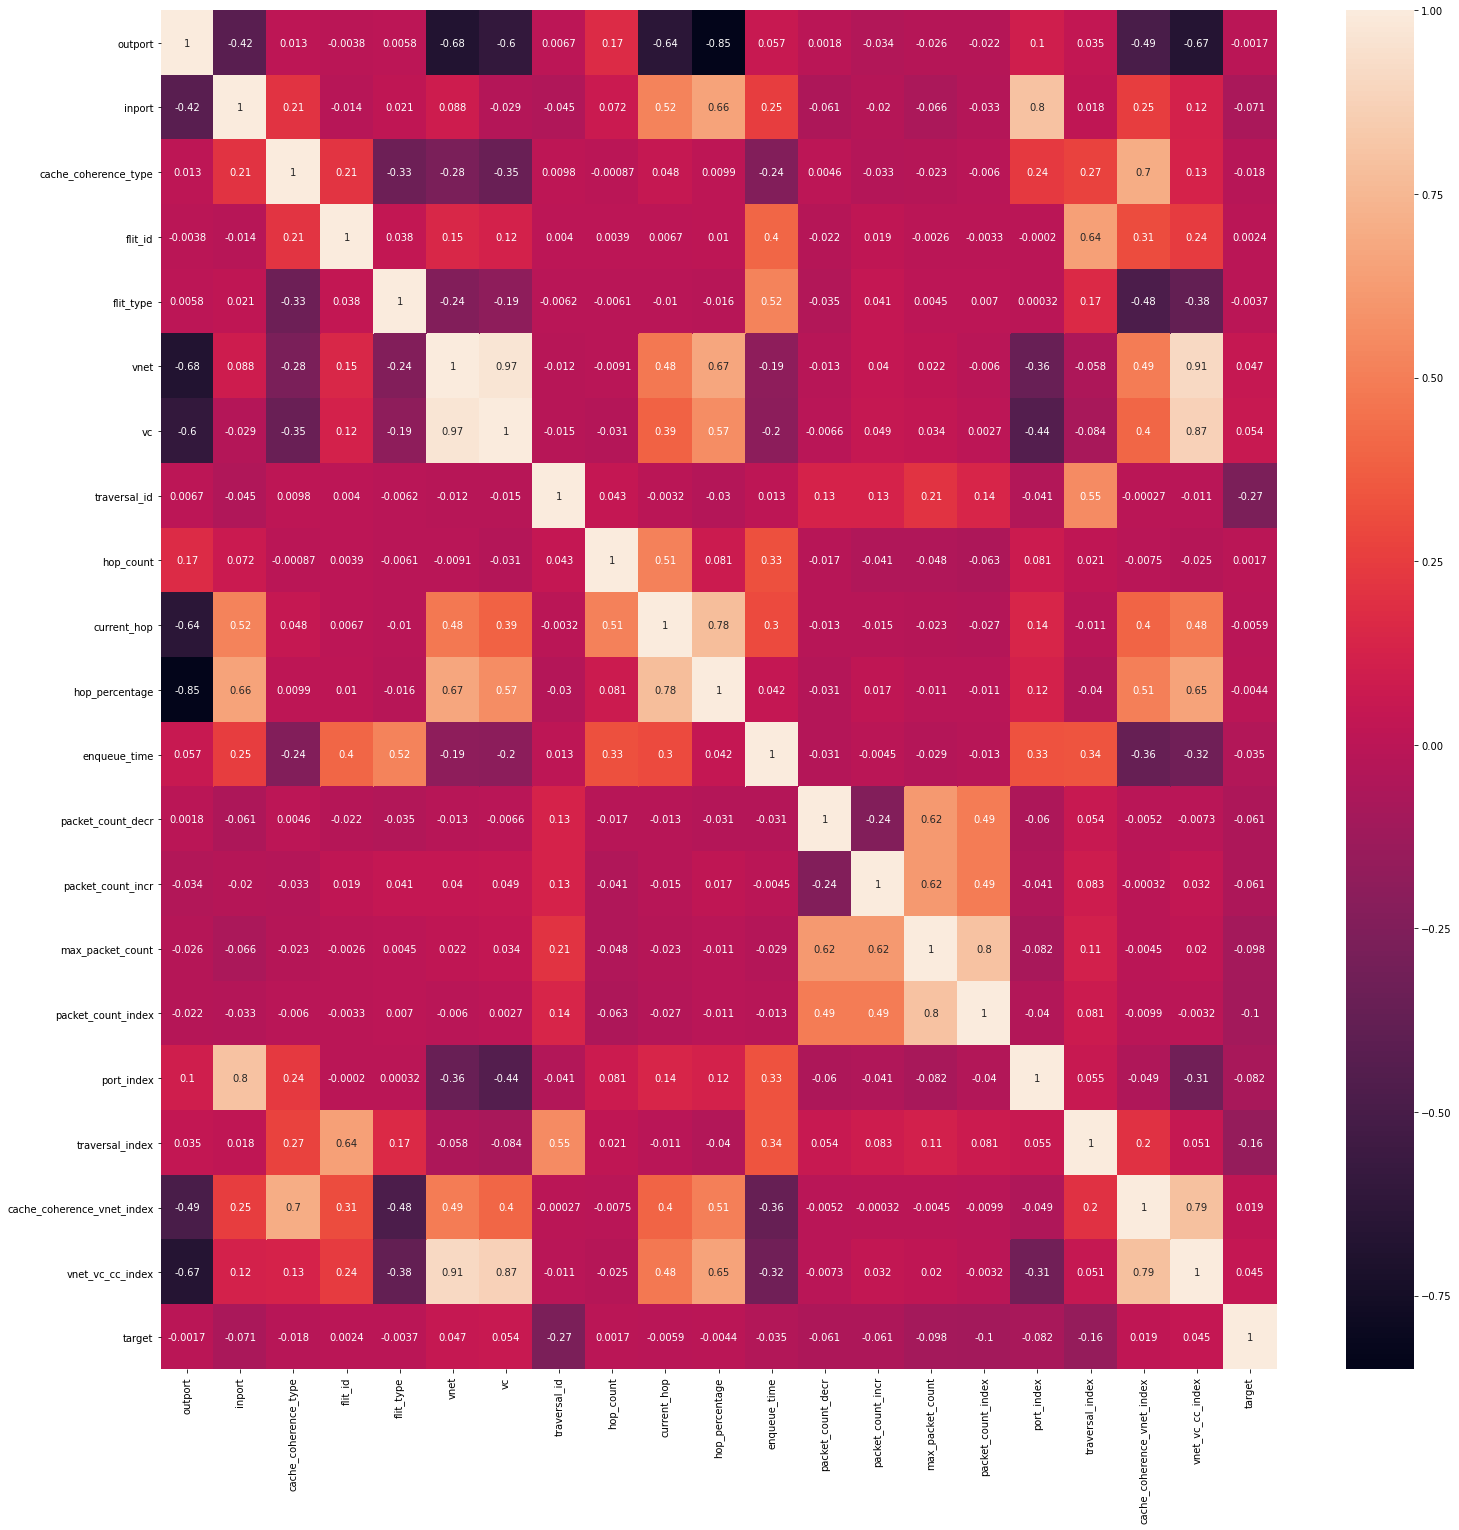

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [17]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

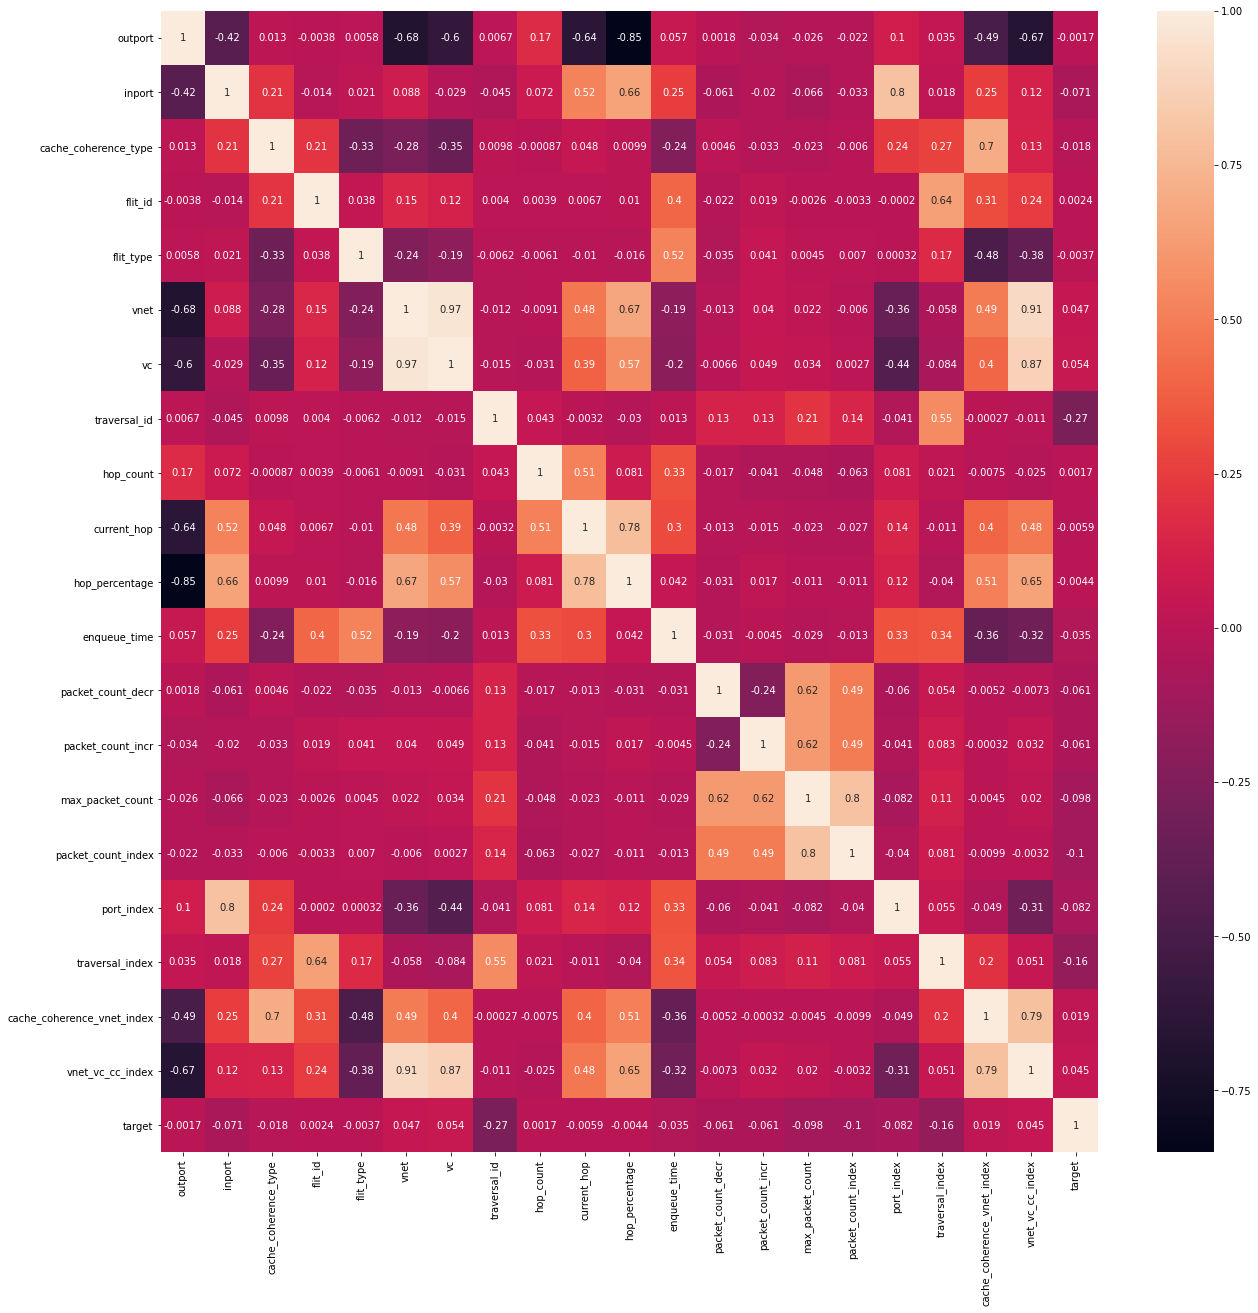

In [19]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

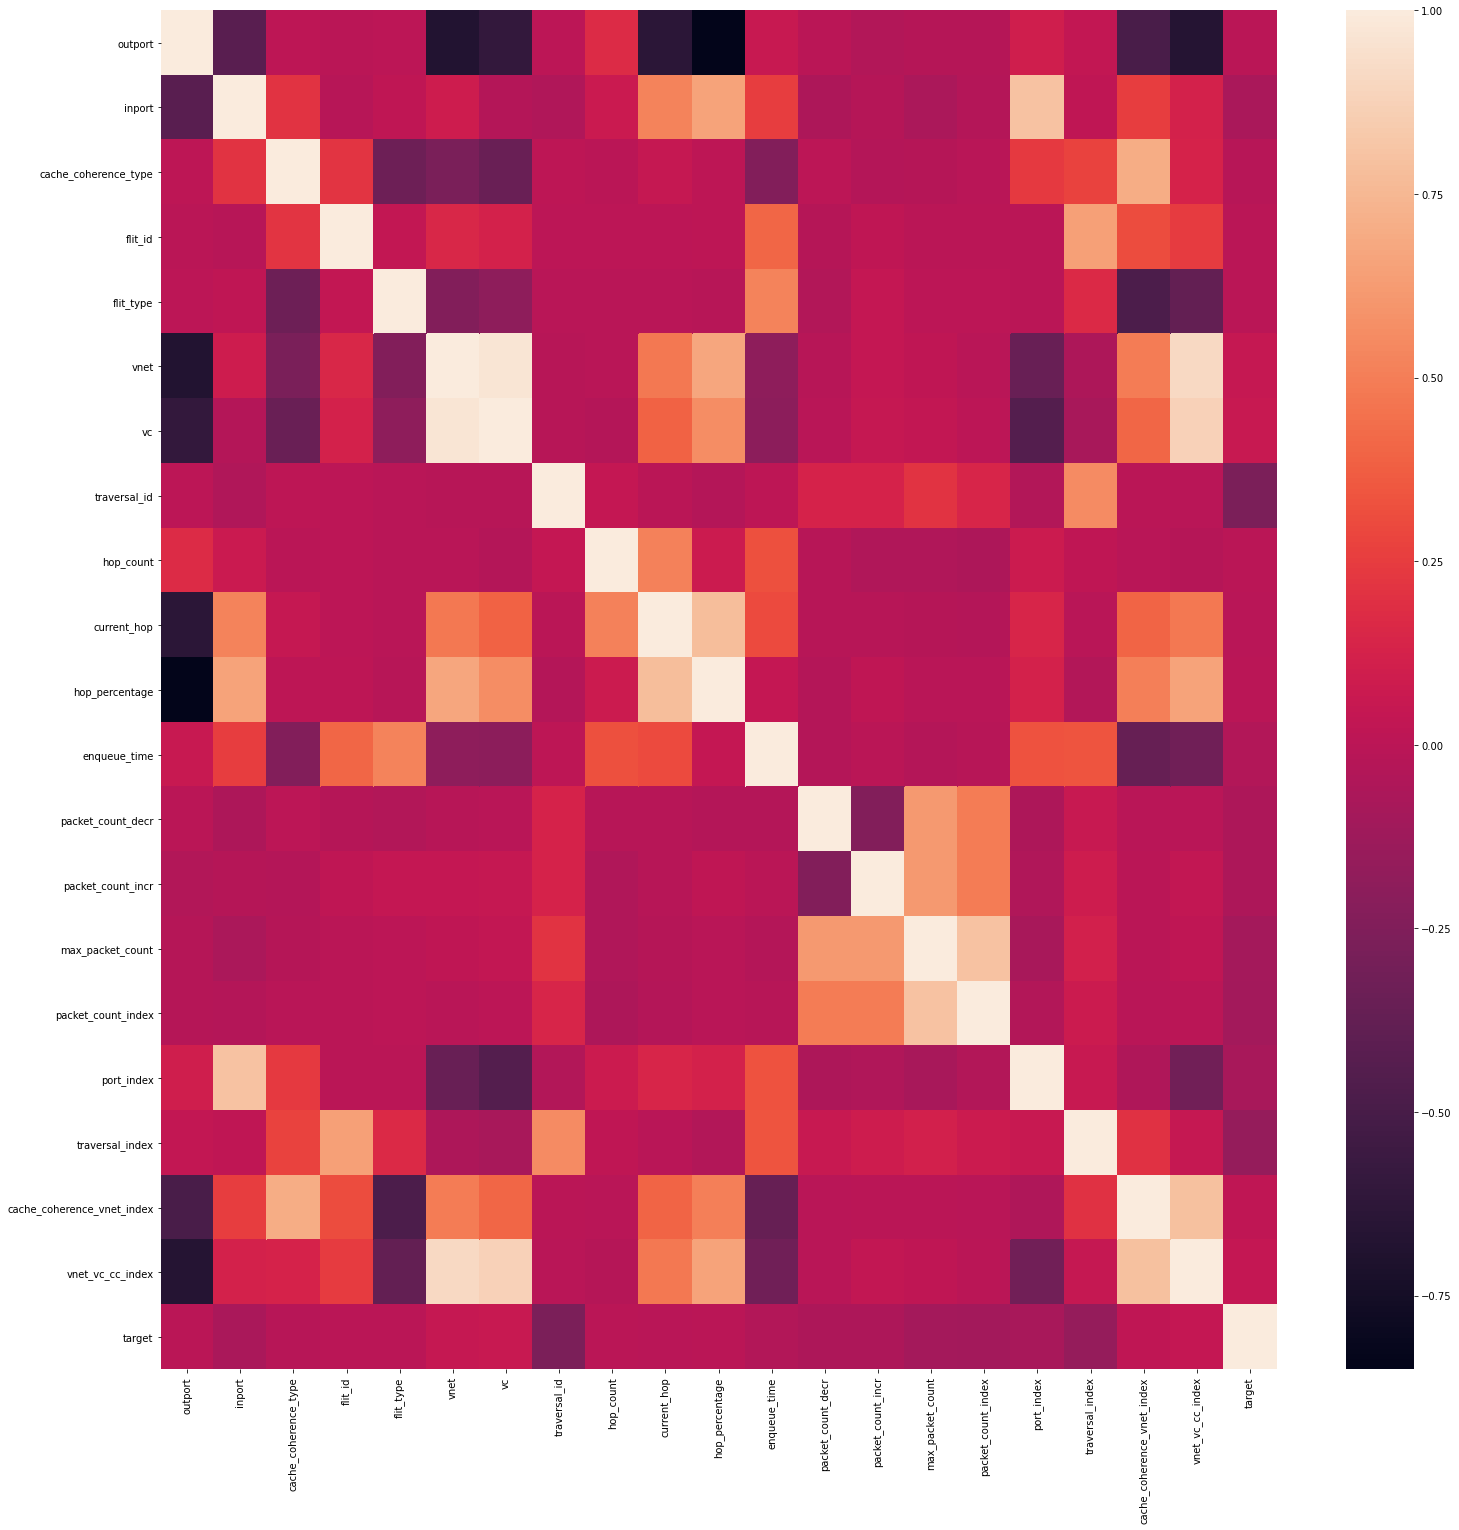

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [22]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.312821,0.000000,0.312821,0.006288,0.0,0.000000,0.000000,0.000000
1,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.307692,0.000000,0.307692,0.006185,0.0,0.000000,0.000000,0.000000
2,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.312821,0.000000,0.312821,0.006288,0.0,0.000000,0.000000,0.000000
3,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.297436,0.000000,0.297436,0.005979,0.0,0.000000,0.000000,0.000000
4,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.307692,0.000000,0.307692,0.006185,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135858,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999900,0.500000,0.333333,0.666667,0.220588,0.020513,0.035897,0.056410,0.004020,1.0,0.266666,0.833333,0.431310
1135859,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999900,0.500000,0.333333,0.666667,0.323529,0.015385,0.041026,0.056410,0.003608,1.0,0.399999,0.833333,0.431310
1135860,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999900,0.500000,0.333333,0.666667,0.426471,0.010256,0.046154,0.056410,0.002989,1.0,0.533333,0.833333,0.431310
1135861,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999900,0.500000,0.333333,0.666667,0.529412,0.005128,0.051282,0.056410,0.002165,1.0,1.000000,0.833333,0.431310


In [23]:
train_X[train_X.duplicated()].shape

(8702, 20)

In [24]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.324324,0.000000,0.324324,0.006864,0.0,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.235294,0.318919,0.005405,0.324324,0.013614,0.0,0.000000,0.944444,1.000000
2,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.250000,0.313514,0.010811,0.324324,0.020135,0.0,0.000004,0.944444,1.000000
3,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.264706,0.308108,0.016216,0.324324,0.026427,0.0,0.000007,0.944444,1.000000
4,0.0,0.5,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.279412,0.302703,0.021622,0.324324,0.032491,0.0,0.000010,0.944444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97987,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.220588,0.021622,0.037838,0.059459,0.004462,1.0,0.266666,0.833333,0.431310
97988,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.323529,0.016216,0.043243,0.059459,0.004004,1.0,0.399999,0.833333,0.431310
97989,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.426471,0.010811,0.048649,0.059459,0.003318,1.0,0.533333,0.833333,0.431310
97990,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.529412,0.005405,0.054054,0.059459,0.002402,1.0,1.000000,0.833333,0.431310


In [25]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [26]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [27]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [28]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [29]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [30]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [31]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [33]:
train_Y = df['target']
train_Y.value_counts()

0    796749
1    339114
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
7                 traversal_id  11211.774893
16                  port_index   4634.907911
17             traversal_index   3948.961073
1                       inport   1641.671846
5                         vnet   1542.561801
6                           vc   1387.519323
15          packet_count_index    964.827680
14            max_packet_count    749.789128
12           packet_count_decr    376.379949
13           packet_count_incr    373.412824
19            vnet_vc_cc_index    343.062641
11                enqueue_time    104.931789
18  cache_coherence_vnet_index     36.053682
2         cache_coherence_type     27.355065
9                  current_hop      6.734796
3                      flit_id      4.497456
10              hop_percentage      4.069529


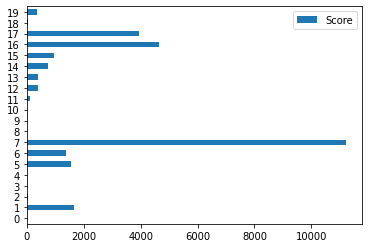

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pickle.dump(logreg, open("logreg-r0.pickle.dat", 'wb'))

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 69.9020568070519
Test Prediction  69.85337165948418


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.91370724140747
Test Prediction  93.57620756336411
Test Prediction  93.19266995707723
Test Prediction  93.7216161327523
Test Prediction  92.94210053859963
Test Prediction  94.10474475965816
Test Prediction  93.87990056239303
Test Prediction  93.73247669594545


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
18,cache_coherence_vnet_index,1.263715
5,vnet,0.933695
2,cache_coherence_type,0.848739
6,vc,0.841183
10,hop_percentage,0.588033
11,enqueue_time,0.461231
16,port_index,0.367090
4,flit_type,0.189017
8,hop_count,0.174567
14,max_packet_count,0.131508


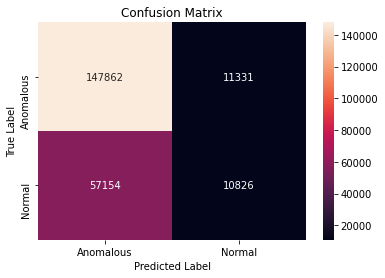

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81    159193
           1       0.49      0.16      0.24     67980

    accuracy                           0.70    227173
   macro avg       0.60      0.54      0.53    227173
weighted avg       0.65      0.70      0.64    227173



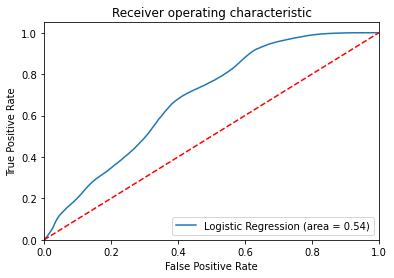

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pickle.dump(knn, open("knn-r0.pickle.dat", 'wb'))

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.18187720784866
Test Prediction  80.54874478921352


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.5581680137154
Test Prediction  87.83801950301438
Test Prediction  87.58958997195444
Test Prediction  88.56583016114382
Test Prediction  86.83797127468583
Test Prediction  88.43710555176195
Test Prediction  87.51324476322438
Test Prediction  87.67497439399112


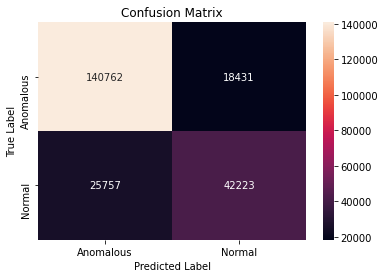

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86    159193
           1       0.70      0.62      0.66     67980

    accuracy                           0.81    227173
   macro avg       0.77      0.75      0.76    227173
weighted avg       0.80      0.81      0.80    227173



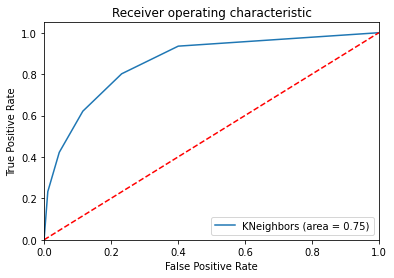

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pickle.dump(nb, open("nb-r0.pickle.dat", 'wb'))

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 65.54556559442715
Test Prediction Score 65.615191946226


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 71.42419789370561
Test Prediction  72.43829043566383
Test Prediction  71.3030628964325
Test Prediction  73.88735240389032
Test Prediction  70.80545128121429
Test Prediction  74.57942764914023
Test Prediction  73.95773901703481
Test Prediction  73.4949357004666


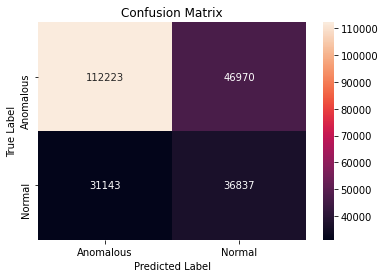

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    159193
           1       0.44      0.54      0.49     67980

    accuracy                           0.66    227173
   macro avg       0.61      0.62      0.61    227173
weighted avg       0.68      0.66      0.67    227173



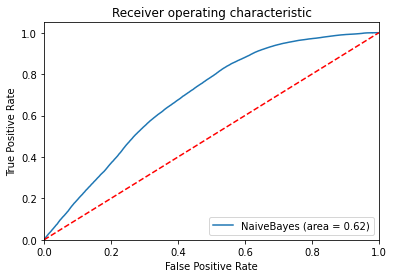

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 726952 samples, validate on 181738 samples
Epoch 1/30
726952/726952 [==============================] - 27s 38us/step - loss: 0.1936 - accuracy: 0.7030 - val_loss: 0.1924 - val_accuracy: 0.7018
Epoch 2/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1917 - accuracy: 0.7034 - val_loss: 0.1924 - val_accuracy: 0.7037
Epoch 3/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1915 - accuracy: 0.7030 - val_loss: 0.1919 - val_accuracy: 0.7037
Epoch 4/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1914 - accuracy: 0.7028 - val_loss: 0.1920 - val_accuracy: 0.7012
Epoch 5/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1914 - accuracy: 0.7024 - val_loss: 0.1918 - val_accuracy: 0.7034
Epoch 6/30
726952/726952 [==============================] - 27s 38us/step - loss: 0.1914 - accuracy: 0.7021 - val_loss: 0.1918 - val_accuracy: 0.7025
Epoch 7/30
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn2-r0.json", "w") as file:
   file.write(json_file)
model.save_weights("nn2-r0.h5")

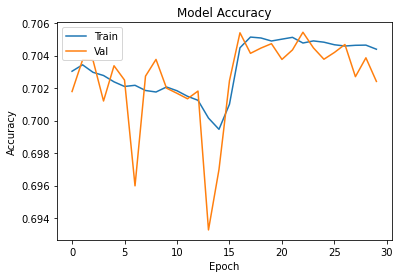

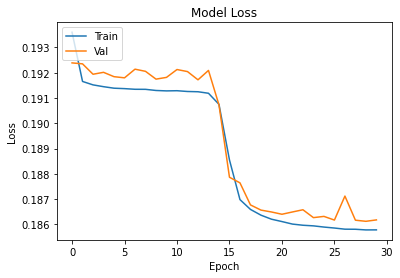

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.31%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.45%
accuracy: 95.34%
accuracy: 95.39%
accuracy: 95.10%
accuracy: 95.62%
accuracy: 95.23%
accuracy: 95.40%
accuracy: 95.18%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 726952 samples, validate on 181738 samples
Epoch 1/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1962 - accuracy: 0.7037 - val_loss: 0.1920 - val_accuracy: 0.7062
Epoch 2/30
726952/726952 [==============================] - 30s 41us/step - loss: 0.1910 - accuracy: 0.7069 - val_loss: 0.1914 - val_accuracy: 0.7049
Epoch 3/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1905 - accuracy: 0.7066 - val_loss: 0.1910 - val_accuracy: 0.7058
Epoch 4/30
726952/726952 [==============================] - 28s 38us/step - loss: 0.1903 - accuracy: 0.7063 - val_loss: 0.1909 - val_accuracy: 0.7044
Epoch 5/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1901 - accuracy: 0.7057 - val_loss: 0.1907 - val_accuracy: 0.7046
Epoch 6/30
726952/726952 [==============================] - 27s 37us/step - loss: 0.1900 - accuracy: 0.7053 - val_loss: 0.1906 - val_accuracy: 0.7041
Epoch 7/30
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn3-r0.json", "w") as file:
   file.write(json_file)
model.save_weights("nn3-r0.h5")

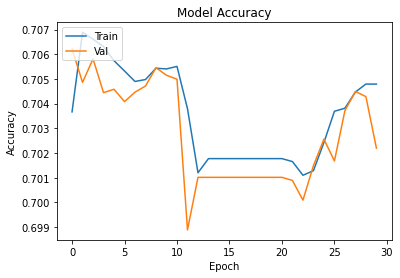

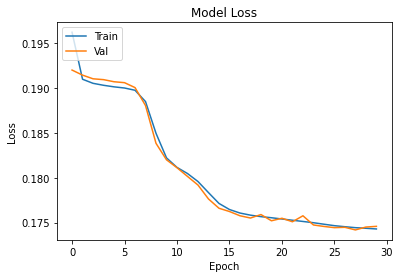

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.78%
accuracy: 93.30%
accuracy: 92.26%
accuracy: 94.63%
accuracy: 91.94%
accuracy: 94.98%
accuracy: 94.33%
accuracy: 93.98%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/50
726952/726952 [==============================] - 31s 42us/step - loss: 0.1970 - accuracy: 0.7018 - val_loss: 0.1903 - val_accuracy: 0.7010
Epoch 2/50
726952/726952 [==============================] - 30s 42us/step - loss: 0.1881 - accuracy: 0.7018 - val_loss: 0.1874 - val_accuracy: 0.7010
Epoch 3/50
726952/726952 [==============================] - 32s 44us/step - loss: 0.1856 - accuracy: 0.7018 - val_loss: 0.1852 - val_accuracy: 0.7010
Epoch 4/50
726952/726952 [==============================] - 30s 42us/step - loss: 0.1845 - accuracy: 0.7018 - val_loss: 0.1845 - val_accuracy: 0.7010
Epoch 5/50
726952/726952 [==============================] - 30s 41us/step - loss: 0.1840 - accuracy: 0.7018 - val_loss: 0.1845 - val_accuracy: 0.7010
Epoch 6/50
726952/726952 [==============================] - 31s 42us/step - loss: 0.1836 - accuracy: 0.7018 - val_loss: 0.1837 - val_accuracy: 0.7010
Epoch 7/50
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn4-r0.json", "w") as file:
   file.write(json_file)
model.save_weights("nn4-r0.h5")

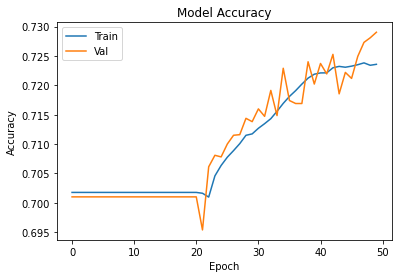

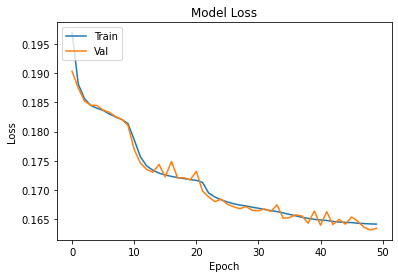

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.87%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.33%
accuracy: 79.20%
accuracy: 78.03%
accuracy: 77.88%
accuracy: 77.37%
accuracy: 79.48%
accuracy: 79.46%
accuracy: 77.96%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/100
726952/726952 [==============================] - 55s 76us/step - loss: 0.1716 - accuracy: 0.7265 - val_loss: 0.1521 - val_accuracy: 0.7623
Epoch 2/100
726952/726952 [==============================] - 53s 72us/step - loss: 0.1570 - accuracy: 0.7542 - val_loss: 0.1461 - val_accuracy: 0.7702
Epoch 3/100
726952/726952 [==============================] - 52s 72us/step - loss: 0.1510 - accuracy: 0.7649 - val_loss: 0.1422 - val_accuracy: 0.7814
Epoch 4/100
726952/726952 [==============================] - 54s 74us/step - loss: 0.1478 - accuracy: 0.7718 - val_loss: 0.1417 - val_accuracy: 0.7830
Epoch 5/100
726952/726952 [==============================] - 52s 71us/step - loss: 0.1453 - accuracy: 0.7760 - val_loss: 0.1337 - val_accuracy: 0.7964
Epoch 6/100
726952/726952 [==============================] - 54s 74us/step - loss: 0.1437 - accuracy: 0.7796 - val_loss: 0.1394 - val_accuracy: 0.7927
Epoch 7/100
726952/726952 [===============

In [0]:
json_file = model.to_json()
with open("nn5-r0.json", "w") as file:
   file.write(json_file)
model.save_weights("nn5-r0.h5")

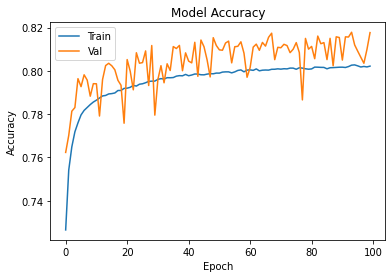

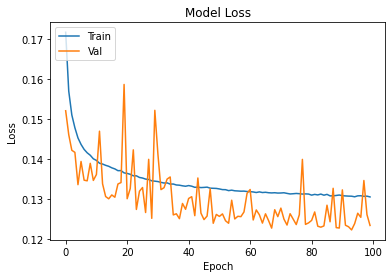

In [0]:
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.42%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.50%
accuracy: 88.75%
accuracy: 88.38%
accuracy: 87.47%
accuracy: 88.07%
accuracy: 88.17%
accuracy: 89.13%
accuracy: 87.64%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 726952 samples, validate on 181738 samples
Epoch 1/50
726952/726952 [==============================] - 61s 84us/step - loss: 0.1761 - accuracy: 0.7146 - val_loss: 0.1591 - val_accuracy: 0.7434
Epoch 2/50
726952/726952 [==============================] - 62s 86us/step - loss: 0.1616 - accuracy: 0.7468 - val_loss: 0.1544 - val_accuracy: 0.7666
Epoch 3/50
726952/726952 [==============================] - 68s 93us/step - loss: 0.1554 - accuracy: 0.7588 - val_loss: 0.1438 - val_accuracy: 0.7786
Epoch 4/50
726952/726952 [==============================] - 66s 91us/step - loss: 0.1514 - accuracy: 0.7654 - val_loss: 0.1393 - val_accuracy: 0.7882
Epoch 5/50
726952/726952 [==============================] - 64s 88us/step - loss: 0.1486 - accuracy: 0.7702 - val_loss: 0.1376 - val_accuracy: 0.7883
Epoch 6/50
726952/726952 [==============================] - 58s 80us/step - loss: 0.1464 - accuracy: 0.7733 - val_loss: 0.1337 - val_accuracy: 0.7969
Epoch 7/50
726952/726952 [======================

In [0]:
json_file = model.to_json()
with open("nn6-r0.json", "w") as file:
   file.write(json_file)
model.save_weights("nn6-r0.h5")

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.38%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.85%
accuracy: 93.58%
accuracy: 93.54%
accuracy: 92.48%
accuracy: 93.37%
accuracy: 92.81%
accuracy: 93.50%
accuracy: 92.48%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r0.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.73539931109619
Test Prediction Score 95.16843991143314


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.10702914523635
Test Prediction Score 87.37267716616857
Test Prediction Score 87.53530824981655
Test Prediction Score 88.70054190862054
Test Prediction Score 86.65945813611881
Test Prediction Score 86.73412378173691
Test Prediction Score 87.06597929741625
Test Prediction Score 87.998799879988


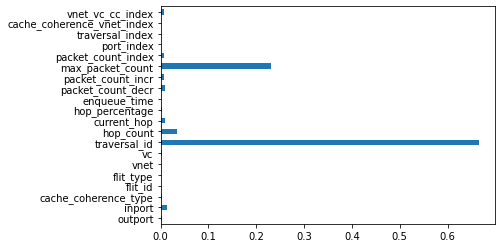

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

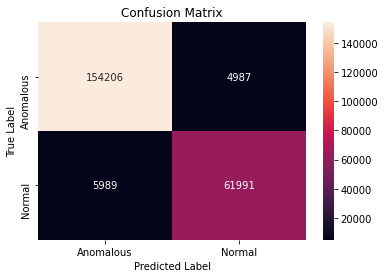

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    159193
           1       0.93      0.91      0.92     67980

    accuracy                           0.95    227173
   macro avg       0.94      0.94      0.94    227173
weighted avg       0.95      0.95      0.95    227173



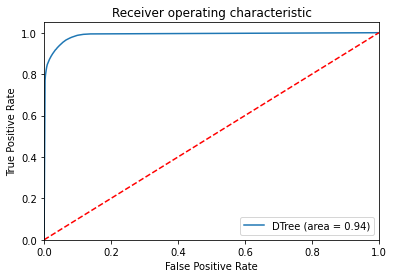

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=20,max_features=20,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pickle.dump(rf, open("rf-r0.pickle.dat", 'wb'))

In [0]:
 y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.5116926564615
Test Prediction Score 96.87462858702398


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 87.44387296922199
Test Prediction Score 88.12446356369502
Test Prediction Score 88.46915491400368
Test Prediction Score 89.90478328757897
Test Prediction Score 87.10523094499754
Test Prediction Score 87.64769176650734
Test Prediction Score 87.91975711141903
Test Prediction Score 88.79232750861293


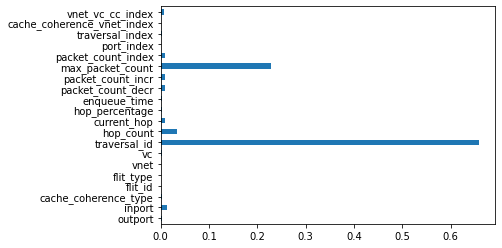

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

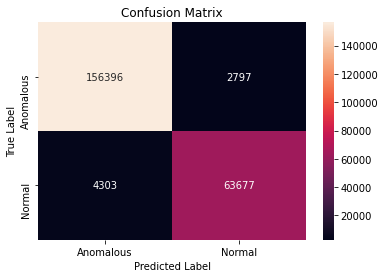

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    159193
           1       0.96      0.94      0.95     67980

    accuracy                           0.97    227173
   macro avg       0.97      0.96      0.96    227173
weighted avg       0.97      0.97      0.97    227173



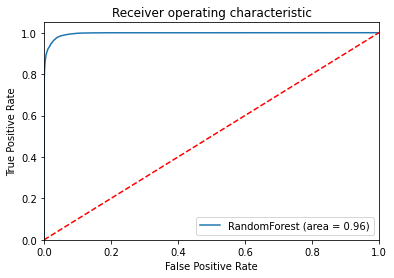

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r0.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.98085155553599
Test Prediction Score 99.7143146412646


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.16936076414402
Test Prediction Score 88.21546384290043
Test Prediction Score 89.36078246097244
Test Prediction Score 90.72734138202007
Test Prediction Score 87.96107393504163
Test Prediction Score 88.4039977652244
Test Prediction Score 88.10518379656044
Test Prediction Score 88.81715757782675


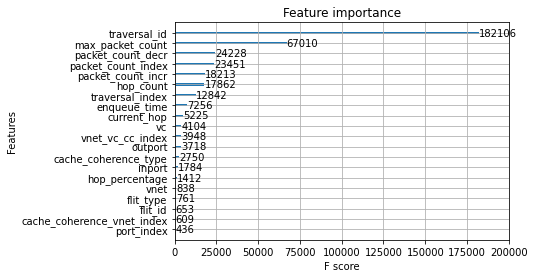

In [52]:
plot_importance(xgbc)
plt.show()

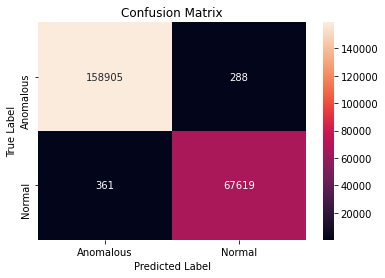

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159193
           1       1.00      0.99      1.00     67980

    accuracy                           1.00    227173
   macro avg       1.00      1.00      1.00    227173
weighted avg       1.00      1.00      1.00    227173



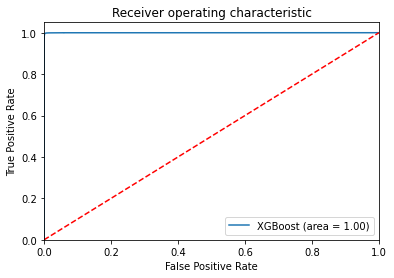

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [57]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 20, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=20,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
pickle.dump(gbm, open("gbm-r0.pickle.dat", 'wb'))

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [60]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 91.56896191220328
Test Prediction Score 91.32511345978615


In [61]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 89.23177402236917
Test Prediction Score 89.45947902340154
Test Prediction Score 89.26528683869282
Test Prediction Score 89.92417361486727
Test Prediction Score 87.70401501550515
Test Prediction Score 89.22755395534587
Test Prediction Score 89.33490912054772
Test Prediction Score 89.18650485738229


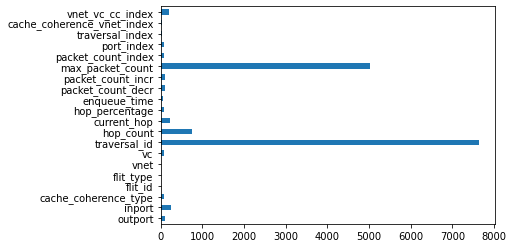

In [62]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

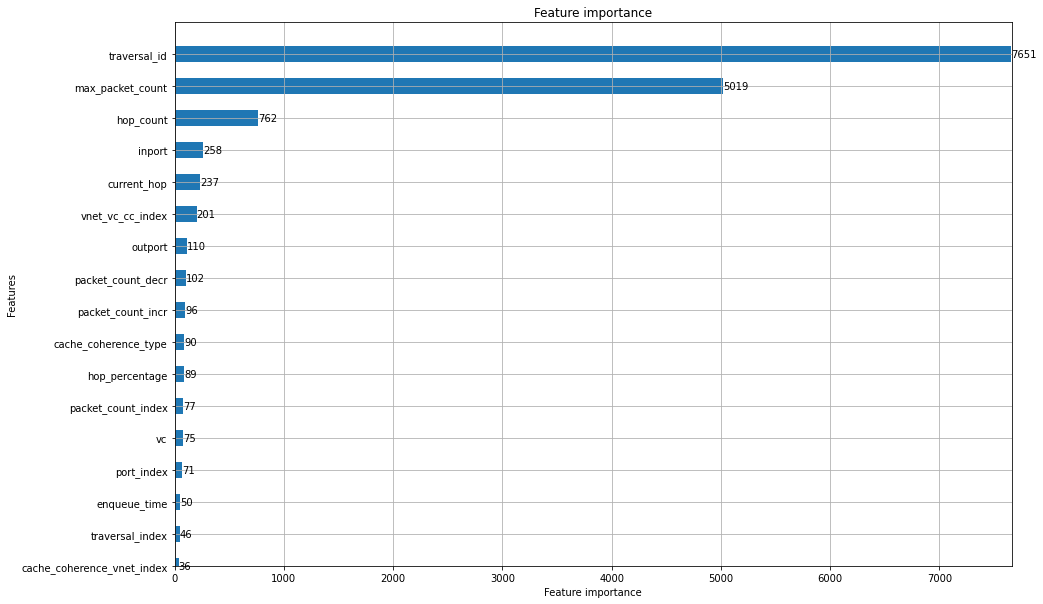

In [68]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7660), ylim = (0,17), figsize = (15,10))
plt.show()

In [69]:
sorted(gbm.feature_importances_,reverse=True)

[7651,
 5019,
 762,
 258,
 237,
 201,
 110,
 102,
 96,
 90,
 89,
 77,
 75,
 71,
 50,
 46,
 36,
 20,
 8,
 2]

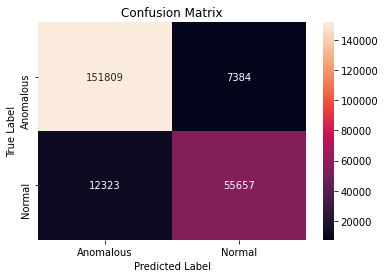

In [70]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94    159193
           1       0.88      0.82      0.85     67980

    accuracy                           0.91    227173
   macro avg       0.90      0.89      0.89    227173
weighted avg       0.91      0.91      0.91    227173



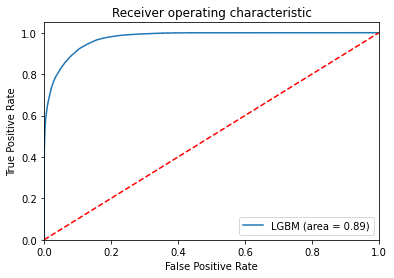

In [73]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()